## **Import Libraries**

In [1]:
!pip install catboost

     |████████████████████████████████| 69.2MB 39kB/s 


In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

from IPython.display import display, HTML

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from lightgbm import LGBMClassifier

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold

from sklearn.preprocessing import  RobustScaler

import tensorflow as tf

from sklearn.manifold import TSNE
import time
import matplotlib.patches as mpatches

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import os

import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
train = pd.read_csv("/content/drive/My Drive/Kaggle/CreditCardFraud/creditcard.csv")
train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## **EDA**

In [5]:
print("Total no of records present in data is {} and total no of features are {}".format(train.shape[0],train.shape[1]))

Total no of records present in data is 284807 and total no of features are 31


In [6]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## **Data Visualization**

In [8]:
numericalData = train.columns
numericalData

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'], dtype='object')

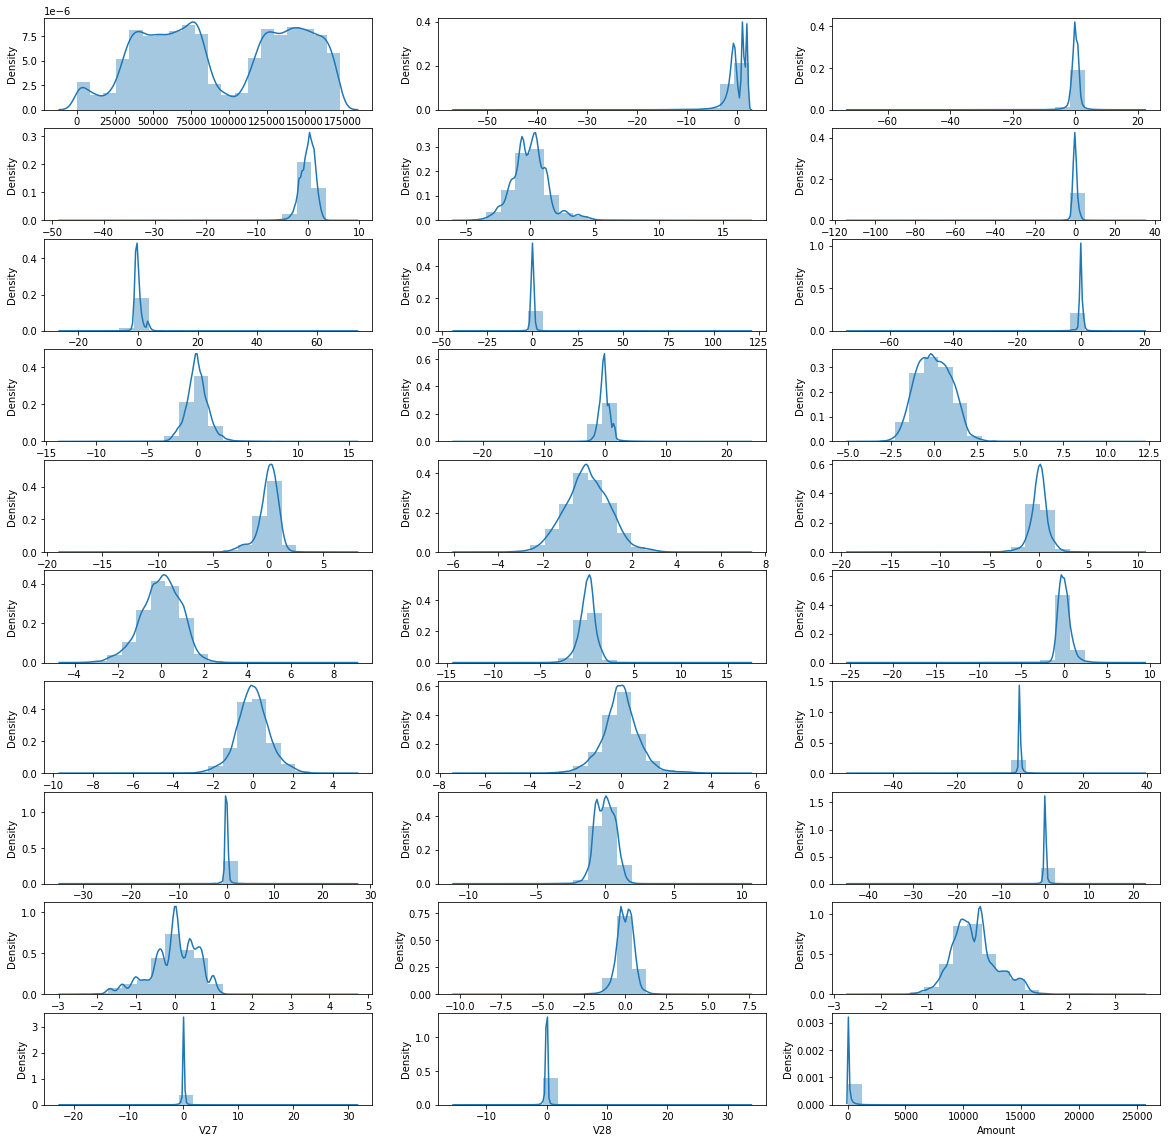

In [9]:
fig, ax = plt.subplots(10, 3, figsize=(20,20))
for column, subplot in zip(numericalData, ax.flatten()):
  sns.distplot(train[column], bins=20, ax=subplot)

(0.0, 172792.0)

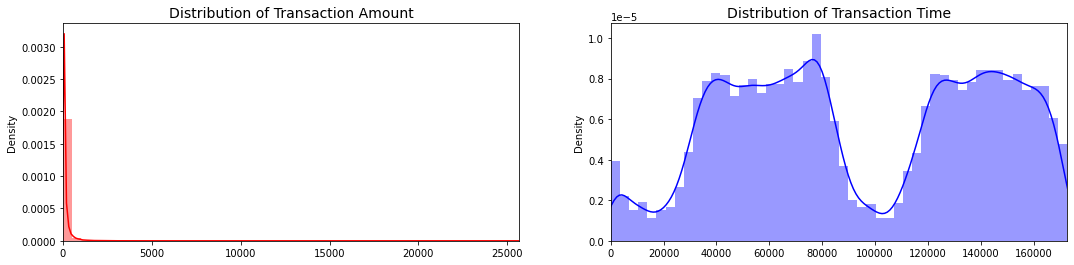

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = train['Amount'].values
time_val = train['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

## **Data Preprocessing**

In [11]:
train.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [12]:
train.duplicated().any()

True

In [13]:
newTrain = train.copy()
totalRecord = newTrain.shape[0]
print("No or records before deleting the duplicates: ", totalRecord)
newTrain.drop_duplicates(inplace= True)
newTrain.reset_index(drop=True)
finalTotalRecord = newTrain.shape[0]
print("No or records after deleting the duplicates: ", finalTotalRecord, "\n")
print("TOtal No of records deleted: {}".format(totalRecord-finalTotalRecord))

No or records before deleting the duplicates:  284807
No or records after deleting the duplicates:  283726 

TOtal No of records deleted: 1081


## **Check Balanced or Unbalanced Data**

In [14]:
newTrain['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

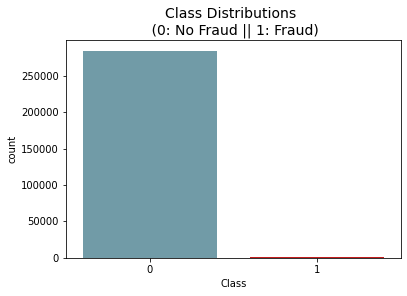

In [15]:
colors = ["#68a0b0", "#DF0101"]

sns.countplot('Class', data=train, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

In [16]:
print("Percentage of Fraud cases: {}".format((newTrain.Class.value_counts()[1]/finalTotalRecord)*100))
print("Percentage of Non Fraud cases: {}".format((newTrain.Class.value_counts()[0]/finalTotalRecord)*100))

Percentage of Fraud cases: 0.1667101358352777
Percentage of Non Fraud cases: 99.83328986416473


## **Balancing the Data**

In [17]:
#Numeric variables
cdata_num = newTrain[['Time','Amount']]
cdata_num.corr()

,Time,Amount
Time,1.000000,-0.010559
Amount,-0.010559,1.000000


In [18]:
#Creating bins for amount and time columns for eda
cdata_eda = newTrain
cdata_eda['AmountBins'] = pd.cut(cdata_eda['Amount'],5)
grpby_AmountBins = cdata_eda.groupby(['AmountBins','Class']).size().reset_index(name='counts')
grpby_AmountBins

,AmountBins,Class,counts
0,"(-25.691, 5138.232]",0,283201
1,"(-25.691, 5138.232]",1,473
2,"(5138.232, 10276.464]",0,46
3,"(5138.232, 10276.464]",1,0
4,"(10276.464, 15414.696]",0,3
5,"(10276.464, 15414.696]",1,0
6,"(15414.696, 20552.928]",0,2
7,"(15414.696, 20552.928]",1,0
8,"(20552.928, 25691.16]",0,1
9,"(20552.928, 25691.16]",1,0


**We can see that most of the fraudant data has transaction value less than  5000**

In [19]:
print("Data having Amount value more than 5200 is: {}".format(train[train['Amount'] > 5200 ].shape[0]))
newTrain = newTrain[newTrain['Amount'] < 5200]
newTrain.reset_index(inplace= True, drop= True)
print(newTrain.shape)

Data having Amount value more than 5200 is: 52
(283674, 32)


In [20]:
newTrain.Class.value_counts()

0    283201
1       473
Name: Class, dtype: int64

In [21]:
fraudData = newTrain[newTrain['Class']==1]
nonFraudData = newTrain[newTrain['Class']==0]
print("Fraud Data: ", fraudData.shape)
print("Non Fraud Data: ", nonFraudData.shape)

Fraud Data:  (473, 32)
Non Fraud Data:  (283201, 32)


In [22]:
nonFraudData = nonFraudData.sample(fraudData.shape[0])
nonFraudData.shape

(473, 32)

In [29]:
data = fraudData.append(nonFraudData, ignore_index= True)
data.drop(['AmountBins'], axis=1, inplace= True)

In [30]:
data = data.reset_index(drop=True)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

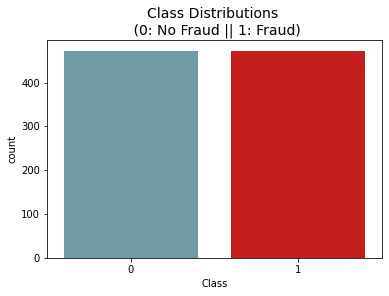

In [39]:
colors = ["#68a0b0", "#DF0101"]

sns.countplot('Class', data=data, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

## **Robust Scaling**

In [31]:
rob_scaler = RobustScaler()

data['Amount'] = rob_scaler.fit_transform( data['Amount'].values.reshape(-1,1))
data['Time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.887476,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,-0.169864,1
1,-0.886738,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,5.199604,1
2,-0.842143,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,2.265479,1
3,-0.813933,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,0.428999,1
4,-0.807976,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,-0.159714,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,0.933893,-0.913930,0.840756,0.850447,-0.987562,0.197189,-0.097020,0.074473,0.541172,0.362919,-1.287904,0.762569,-0.415844,-2.046736,-0.742807,0.010617,0.856150,0.341069,1.096886,-0.006446,-0.221927,-0.165845,-0.581346,-0.002741,0.520712,-0.430664,-0.357934,-0.305901,-0.135354,-0.144488,0
942,0.739015,-1.134776,0.638536,1.383282,-0.096258,-0.297090,0.260119,-0.206016,0.779056,0.542083,-0.940762,-1.879734,-1.150663,-2.207510,0.379667,0.243744,0.980752,-0.773388,0.664124,-1.306500,-0.438332,0.152836,0.134468,-0.048160,0.492322,-0.315167,-0.888307,-0.070441,0.088185,0.218788,0
943,0.602738,2.014261,-0.127412,-1.012974,0.325930,-0.169882,-0.953292,0.052589,-0.168574,0.342377,0.255405,0.965661,0.923321,-0.478372,0.565211,-0.618964,0.084614,-0.479741,-0.350722,0.403781,-0.246464,-0.237060,-0.605116,0.345391,0.065334,-0.355533,0.174268,-0.077143,-0.070275,-0.160830,0
944,-0.233660,-0.287744,1.156227,0.950435,-0.140095,0.485150,-0.470715,0.774326,-0.067492,-0.461518,-0.539951,-0.825749,0.066636,1.064541,-0.638231,0.867744,0.591220,-0.342851,0.039438,0.218201,0.204351,-0.306542,-0.778402,-0.114536,-0.485661,-0.019256,0.121049,0.247793,0.091835,-0.073335,0


## **Selecting Important features**

In [32]:
features = data.drop(['Class'], axis=1)
label = data['Class']

In [33]:
modelLR = RandomForestClassifier()
selectFeaturesFromRFE = RFE(estimator=modelLR,step=1)
selectFeaturesFromRFE.fit(features,label)
print(selectFeaturesFromRFE.ranking_)

[14  5  1  1  1  2 15  1  1  3  1  1  1  8  1 11  1  1  1  1  1  7 12  6
 16  9  4 13 10  1]


**Features Selected from RFE:  V2,	V3,	V4, V7, V8, V10, V11, V12, V14, V16, V17, V19, V20, V21, Amount**

In [34]:
finalFeatures = data.loc[:,['V2', 'V3', 'V4', 'V7', 'V8', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V19', 'V20', 'V21', 'Amount']]
label = data['Class']

## **StratifiedKFold**

In [41]:
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
for train_index, test_index in sss.split(finalFeatures, label):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = finalFeatures.iloc[train_index], finalFeatures.iloc[test_index]
    original_ytrain, original_ytest = label.iloc[train_index], label.iloc[test_index]
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Train: [ 95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112
 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130
 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148
 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166
 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184
 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202
 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220
 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238
 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256
 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274
 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292
 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310
 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328
 329 330 331 332 333 334 335 336 337 338 339

## **Checking for Density Alogrithm requirement**

In [46]:
# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(finalFeatures.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

T-SNE took 5.4 s


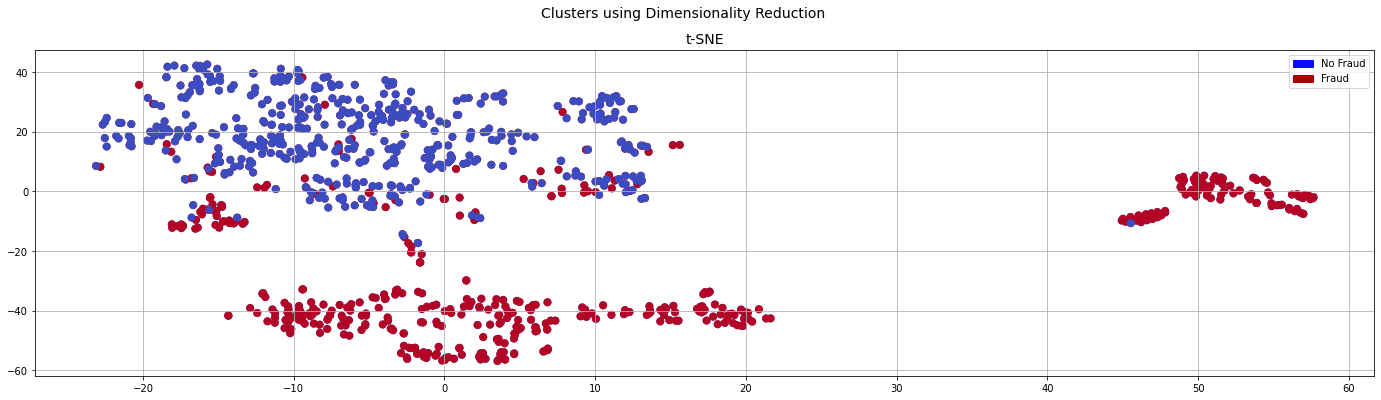

In [47]:
f, (ax1) = plt.subplots(1, 1, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(label == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(label == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])
plt.show()

## **Model Building**

In [49]:
X_train, X_test, y_train, y_test = train_test_split(finalFeatures, label, test_size=0.2, random_state=4)
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [50]:
def ModelTypes():
  modelType = []
  modelType.append(('LogisticRegression', LogisticRegression()))
  modelType.append(('KNN', KNeighborsClassifier(n_neighbors=2)))
  modelType.append(('SVC', SVC())) 
  modelType.append(('ExtraTreesClassifier', ExtraTreesClassifier(n_jobs=-1, min_samples_leaf=1, max_depth=20, min_samples_split=3, n_estimators=1000)))
  modelType.append(('DecisionTree', DecisionTreeClassifier()))
  modelType.append(('RandomForest', RandomForestClassifier()))
  modelType.append(('XGBRF', XGBRFClassifier(n_jobs=-1)))
  modelType.append(('GradientBoostingClassifier', GradientBoostingClassifier(random_state=32,max_depth=5,n_estimators=500,min_samples_split=2,min_samples_leaf=2)))
  modelType.append(('XGBClassifier', XGBClassifier(n_estimators=500,max_depth=5,booster='gbtree',n_jobs=-1,learning_rate=0.1,reg_lambda=0.01,reg_alpha=0.3)))
  modelType.append(('CatBoostClassifier', CatBoostClassifier(silent=True)))

  return modelType

In [51]:
def ModelBuilding(X_train, y_train, models):
  num_folds = 10
  scoring = 'recall'
  SEED = 32
  modelScoreDict = {}
  for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=SEED)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring = scoring)
    modelScoreDict[name] = cv_results
    scores = "{}: {} ({})" .format(name, cv_results.mean(), cv_results.std())
    print(scores)

  return modelScoreDict

In [52]:
%%time
models = ModelTypes()
print("Printing details based on recall score", "\n")
modelScoreDict = ModelBuilding(X_train, y_train, models)

printing details based on recall score
LogisticRegression: 0.9008893907256063 (0.035668859128232325)
KNN: 0.8564795092277573 (0.050786738664198104)
SVC: 0.8700716075546975 (0.05759860326922076)
ExtraTreesClassifier: 0.8958391731498491 (0.05454624090047159)
DecisionTree: 0.9013662720209737 (0.061380843793803944)
RandomForest: 0.8983893907256064 (0.0413275267241788)
XGBRF: 0.8754487288620514 (0.048819438159758644)
GradientBoostingClassifier: 0.9010638093302574 (0.03468433527232414)
XGBClassifier: 0.9114409205162666 (0.03789764126774343)
CatBoostClassifier: 0.9019610508414944 (0.038621102777025317)
CPU times: user 1min 38s, sys: 3.44 s, total: 1min 42s
Wall time: 1min 11s


In [55]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "ExtraTreesClassifier": ExtraTreesClassifier(),
    "RandomForest": RandomForestClassifier(),
    "XGBRF": XGBRFClassifier(n_jobs=-1),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "XGBClassifier": XGBClassifier(),
    "CatBoostClassifier": CatBoostClassifier(silent=True),
}

print("Printing details based on accuracy score", "\n")

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Printing details based on accuracy score 

Classifiers:  LogisticRegression Has a training score of 93.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 93.0 % accuracy score
Classifiers:  SVC Has a training score of 92.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 88.0 % accuracy score
Classifiers:  ExtraTreesClassifier Has a training score of 93.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 92.0 % accuracy score
Classifiers:  XGBRFClassifier Has a training score of 92.0 % accuracy score
Classifiers:  GradientBoostingClassifier Has a training score of 93.0 % accuracy score
Classifiers:  XGBClassifier Has a training score of 93.0 % accuracy score


Custom logger is already specified. Specify more than one logger at same time is not thread safe.

Classifiers:  CatBoostClassifier Has a training score of 93.0 % accuracy score


## **Voting Classifier**

In [58]:
gbr = GradientBoostingClassifier(random_state=32,max_depth=5,n_estimators=500,min_samples_split=2,min_samples_leaf=2)
dt = DecisionTreeClassifier()
xgb = XGBClassifier(n_estimators=500,max_depth=5,booster='gbtree',n_jobs=-1,learning_rate=0.1,reg_lambda=0.01,reg_alpha=0.3)

In [59]:
modelFinal = VotingClassifier([('gbr', gbr),('xgb',xgb),('dt', dt)])

modelFinal.fit(X_train, y_train)
y_pred = modelFinal.predict(X_test)
  
# using accuracy_score metric to predict accuracy
score = accuracy_score(y_test, y_pred)
recallScore = recall_score(y_test, y_pred )
precisionScore = precision_score(y_test, y_pred )
print("Hard Voting Score %.3f" % score)
print("Hard Voting Recall Score %.3f" % recallScore)
print("Hard Voting Recall Score %.3f" % precisionScore)

Hard Voting Score 0.963
Hard Voting Recall Score 0.946
Hard Voting Recall Score 0.978
CPU times: user 1.53 s, sys: 2.45 ms, total: 1.53 s
Wall time: 1.53 s


## **Stacking Classifier**

In [60]:
estimators = [('xgb',xgb),('dt', dt)]
clf = StackingClassifier(estimators=estimators, final_estimator=GradientBoostingClassifier())
clf.fit(X_train, y_train).score(X_test, y_test)

# using accuracy_score metric to predict accuracy
score = accuracy_score(y_test, y_pred)
recallScore = recall_score(y_test, y_pred )
precisionScore = precision_score(y_test, y_pred )
print("Hard Voting Score %.3f" % score)
print("Hard Voting Recall Score %.3f" % recallScore)
print("Hard Voting Recall Score %.3f" % precisionScore)

Hard Voting Score 0.963
Hard Voting Recall Score 0.946
Hard Voting Recall Score 0.978


## **Hyperparameter Tuning**

In [62]:
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)
tree_clf = grid_tree.best_estimator_


In [63]:
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  92.72%
Knears Neighbors Cross Validation Score 91.8%
Support Vector Classifier Cross Validation Score 92.72%
DecisionTree Classifier Cross Validation Score 91.0%


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

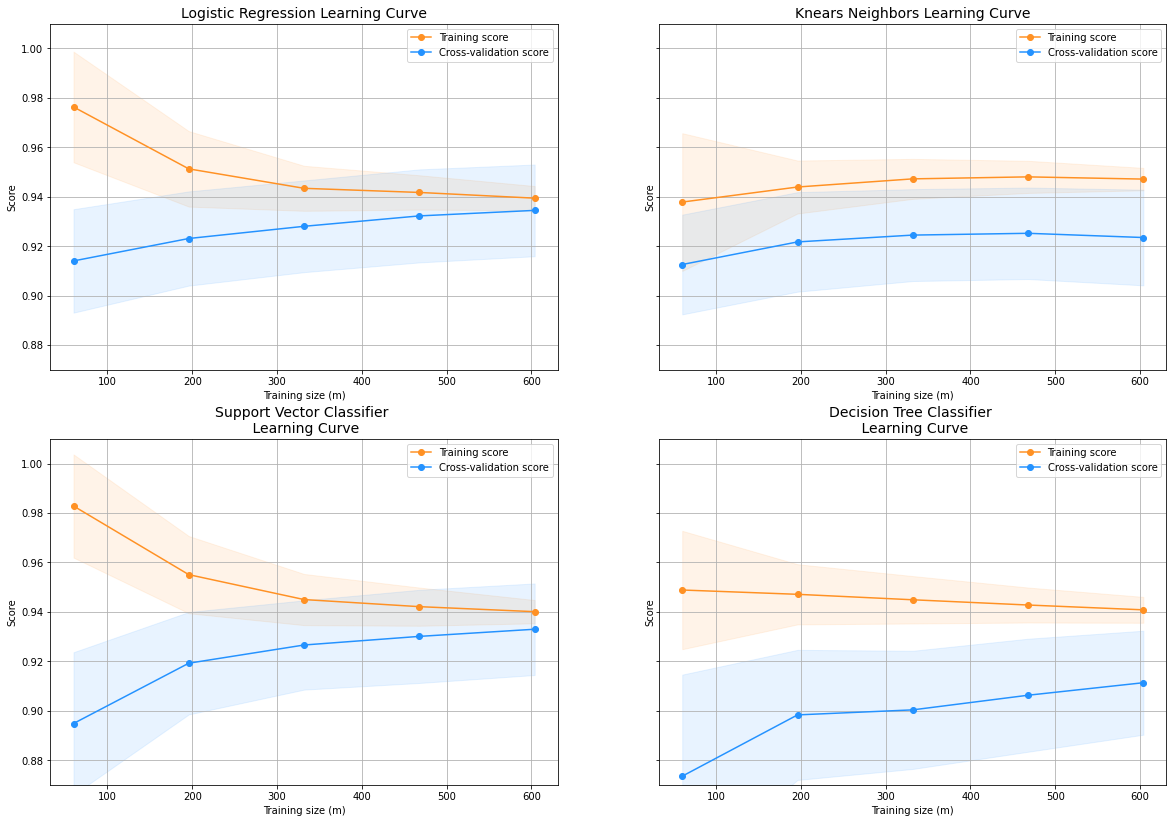

In [64]:
# Let's Plot LogisticRegression Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, knears_neighbors, svc, tree_clf, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

In [65]:
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)


In [66]:
print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.9681061030235163
KNears Neighbors:  0.9181690929451288
Support Vector Classifier:  0.96976483762598
Decision Tree Classifier:  0.9102323628219485


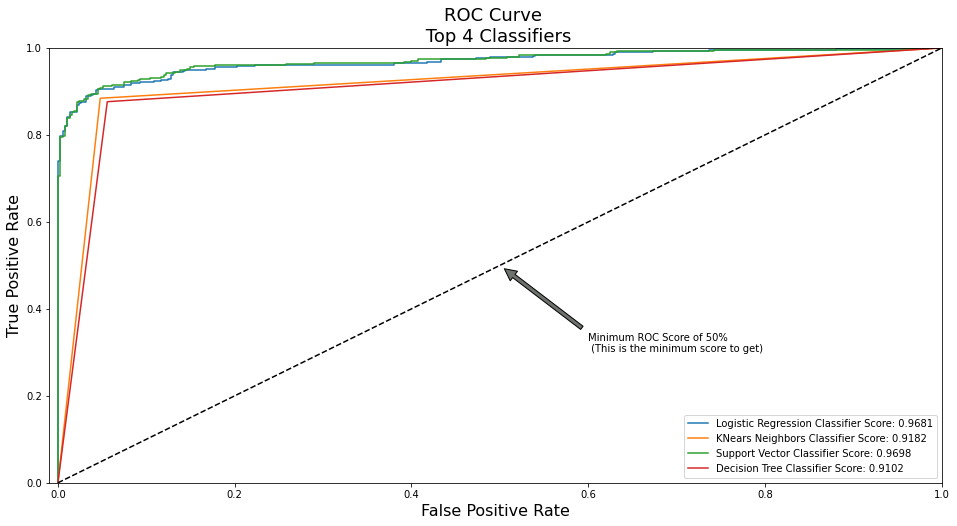

In [67]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_train, log_reg_pred)
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = log_reg.predict(X_train)

print('---' * 45)
# print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)


---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 0.91
Precision Score: 0.97
F1 Score: 0.94
Accuracy Score: 0.94
---------------------------------------------------------------------------------------------------------------------------------------


## **Using Tensorflow**

In [68]:
seed = 32

X_train,X_test,y_train,y_test = train_test_split(finalFeatures,
                                                label,
                                                test_size=0.2,
                                                random_state = seed)
tf.random.set_seed(seed)
np.random.seed(seed)

In [86]:
# Architect the model

modelKeras = tf.keras.models.Sequential()
modelKeras.add(tf.keras.layers.Dropout(0.2))
modelKeras.add(tf.keras.layers.Dense( units = 1024, activation= 'relu',input_dim = 15))
modelKeras.add(tf.keras.layers.Dense( units = 256, activation= 'relu'))
modelKeras.add(tf.keras.layers.Dropout(0.25))
modelKeras.add(tf.keras.layers.Dense( units = 128, activation= 'relu'))
modelKeras.add(tf.keras.layers.Dropout(0.25))
modelKeras.add(tf.keras.layers.Dense( units = 64, activation= 'relu'))
modelKeras.add(tf.keras.layers.Dropout(0.2))
modelKeras.add(tf.keras.layers.Dense( units = 32, activation= 'relu'))
modelKeras.add(tf.keras.layers.Dense( units = 1, activation= 'sigmoid' ))

# Compile model
modelKeras.compile(#optimizer = "Adam" , 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy', 
                                                 verbose=4,
                                                 patience=10,
                                                 mode='max',
                                                 restore_best_weights=True)


#Custom Callback
class MyThresholdCallback(tf.keras.callbacks.Callback):
    def __init__(self, cl):
        super(MyThresholdCallback, self).__init__()
        self.cl = cl
        
    def on_epoch_end(self, epoch, logs=None):
        test_score = logs["val_accuracy"]
        train_score = logs["accuracy"]
        if ( test_score > train_score and test_score > self.cl ) or test_score == 1 :
            self.model.stop_training = True
            

myScoreMonitor = MyThresholdCallback(cl=0.93)

epoch_hist = modelKeras.fit(X_train,
                       y_train,
                       epochs=200,
                       validation_data=(X_test,y_test),
                       callbacks= [earlyStopping] )

Epoch 1/200
24/24 [==============================] - 1s 11ms/step - loss: 0.4149 - accuracy: 0.7593 - val_loss: 0.2522 - val_accuracy: 0.9316
Epoch 2/200
24/24 [==============================] - 0s 4ms/step - loss: 0.2841 - accuracy: 0.9140 - val_loss: 0.2008 - val_accuracy: 0.9421
Epoch 3/200
24/24 [==============================] - 0s 4ms/step - loss: 0.2382 - accuracy: 0.9299 - val_loss: 0.2180 - val_accuracy: 0.9263
Epoch 4/200
24/24 [==============================] - 0s 4ms/step - loss: 0.2147 - accuracy: 0.9286 - val_loss: 0.2055 - val_accuracy: 0.9316
Epoch 5/200
24/24 [==============================] - 0s 4ms/step - loss: 0.1685 - accuracy: 0.9378 - val_loss: 0.2006 - val_accuracy: 0.9421
Epoch 6/200
24/24 [==============================] - 0s 4ms/step - loss: 0.1731 - accuracy: 0.9312 - val_loss: 0.2074 - val_accuracy: 0.9368
Epoch 7/200
24/24 [==============================] - 0s 4ms/step - loss: 0.1716 - accuracy: 0.9193 - val_loss: 0.2185 - val_accuracy: 0.9316
Epoch 8/200


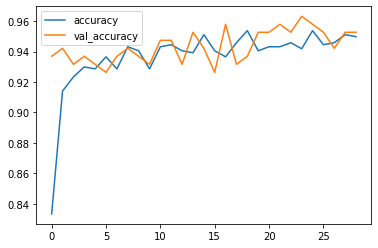

In [80]:
plt.plot(epoch_hist.history['accuracy'])
plt.plot(epoch_hist.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy' ])

In [87]:
predlabel= modelKeras.predict_classes(X_test)
confusion_matrix(y_test,predlabel)

array([[89,  5],
       [ 7, 89]])

In [90]:
probabilityValues = modelKeras.predict(X_test)
precision,recall,_ = precision_recall_curve(y_test, probabilityValues)

In [91]:
auc_keras = auc(recall, precision)
auc_keras

0.9815848177482673

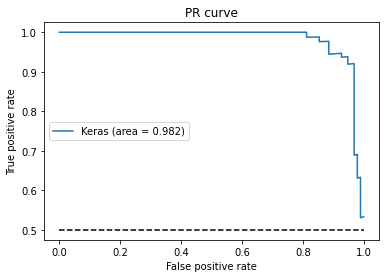

In [92]:
plt.figure(1)
plt.plot([0, 1], [0.5, 0.5], 'k--')
plt.plot(recall, precision, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('PR curve')
plt.legend(loc='best')
plt.show()

## **Using SMOTE to Balance the Data**

In [100]:
print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm = LogisticRegression()


rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)


Length of X (train): 757 | Length of y (train): 757
Length of X (test): 189 | Length of y (test): 189
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9325287556639944
precision: 0.9741700713024738
recall: 0.8891228070175441
f1: 0.9287094016841726
---------------------------------------------------------------------------------------------------------------------------------------
